### Data transformation and correlation analysis

In [64]:
# Import pandas library to work with csv files as dataframes
import pandas as pd
import matplotlib.pyplot as plt

Let's create the dataframes on which we'll make our analysis and dashboards

In [65]:
df_emissions = pd.read_csv('../OCDE_data_modified/greenhouse_gas_emissions_ton_CO2.csv')
df_mortality = pd.read_csv('../OCDE_data_modified/mortality_rate_for_100K.csv')

In [66]:
df_mortality_neoplasms = df_mortality.loc[df_mortality['death_cause'] == 'Neoplasms'].reset_index().drop(columns=['index', 'death_cause'])
df_mortality_respiratory = df_mortality.loc[df_mortality['death_cause'] == 'Diseases of the respiratory system'].reset_index().drop(columns=['index', 'death_cause'])

In [67]:
df_mortality_respiratory.head(3)

,country_name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Argentina,197.5,195.1,187.2,195.6,199.0,208.3,229.9,225.5,209.3,207.1,NaN
1,Australia,62.3,64.0,65.8,60.1,64.6,65.4,65.6,69.9,60.9,66.1,50.1
2,Austria,46.4,43.7,42.0,41.3,38.0,44.7,42.7,51.2,52.9,49.4,44.4


In [68]:
df_mortality_neoplasms.head(3)

,country_name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Argentina,225.5,219.5,220.1,218.6,217.9,221.9,217.9,213.6,204.4,204.2,NaN
1,Australia,224.3,222.2,215.1,214.7,209.6,212.8,206.4,200.8,201.1,204.2,193.2
2,Austria,228.4,228.1,227.6,221.4,221.1,215.2,210.9,208.0,207.8,203.7,204.2


In [69]:
df_emissions = df_emissions.rename(columns={'Country': 'country_name'}).drop(columns=['1990', '1991', '1992', '1993', '1994', '1995', '1996',
                                                                                      '1997', '1998', '1999', '2000', '2001', '2002', '2003',
                                                                                      '2004', '2005', '2006', '2007', '2008', '2009'])
df_emissions.head(3)

,country_name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Argentina,405405.120,393434.700,372200.670,377824.070,368295.250,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,603247.575,582074.533,566439.399,549887.674,548935.921,537823.577,513732.804,512506.387,518521.948,505803.692,487591.186
2,Austria,80372.542,77848.513,75803.618,77234.516,73849.418,76285.631,77423.910,79002.759,75419.521,77111.427,72339.103


Now we want to leave only countries that are present in both the datasets of mortality and emissions.

In [70]:
# Get the country list from emissions dataset
countries = df_emissions['country_name'].tolist()

# We remove countries that are not in emissions dataset from the other two datasets
df_mortality_neoplasms = df_mortality_neoplasms[df_mortality_neoplasms['country_name'].isin(countries)]
df_mortality_respiratory = df_mortality_respiratory[df_mortality_respiratory['country_name'].isin(countries)]

# We repeat the process the other way around, only once because both mortality datasets have same countries
countries = df_mortality_neoplasms['country_name'].tolist()

# eliminar los paises que no están en la lista en el tercer dataset
df_emissions = df_emissions[df_emissions['country_name'].isin(countries)]

In [71]:
# Let's verify all countries are now the same in all three datasets
df_emissions['country_name'].tolist().sort() == df_mortality_neoplasms['country_name'].tolist().sort() == df_mortality_respiratory['country_name'].tolist().sort()

True

We now have ordered datasets with same countries, so we can start to make some agreggations to calculate the relationship between our variables.

In [72]:
total_values1 = df_emissions.sum(axis=0)
total_values2 = df_mortality_neoplasms.mean(axis=0)
total_values3 = df_mortality_respiratory.mean(axis=0)

C:\Users\renzo\AppData\Local\Temp\ipykernel_1136\3922074163.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_values2 = df_mortality_neoplasms.mean(axis=0)
C:\Users\renzo\AppData\Local\Temp\ipykernel_1136\3922074163.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_values3 = df_mortality_respiratory.mean(axis=0)


In [73]:
df_total1 = pd.DataFrame(total_values1, columns=['total emissions in ton CO2']).T
df_total2 = pd.DataFrame(total_values2, columns=['average neoplasms deaths each 100k']).T
df_total3 = pd.DataFrame(total_values3, columns=['average respiratory deaths each 100k']).T

df_total = pd.concat([df_total1, df_total2, df_total3], axis=0).drop(columns=['country_name']).reset_index()

df_total.head(10)

,index,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,total emissions in ton CO2,18239120.89,17905957.096,17725096.132,17897055.91,17784446.437,17361373.905,17301040.262,15986808.213,16126619.283,15462996.797,13040569.908
1,average neoplasms deaths each 100k,230.652174,227.233333,226.821739,224.043478,223.093478,220.802273,218.570455,215.790244,212.087179,211.061765,207.052941
2,average respiratory deaths each 100k,84.304348,83.042222,82.521739,81.397826,78.654348,85.052273,81.252273,83.295122,85.174359,74.173529,60.905882


In [109]:
# Traspose the dataframe
df_corr = df_total.T

# Set the first row as the columns name
new_cols = df_corr.iloc[0]
df_corr = df_corr[1:] 
df_corr.columns = new_cols

In [121]:
# Changing data type
df_corr["total emissions in ton CO2"] = df_corr["total emissions in ton CO2"].astype(float)
df_corr["average neoplasms deaths each 100k"] = df_corr["average neoplasms deaths each 100k"].astype(float)
df_corr["average respiratory deaths each 100k"] = df_corr["average respiratory deaths each 100k"].astype(float)

# Delete index column
df_corr = df_corr.reset_index(drop=True)

# Keeping only numeric columns
df_corr = df_corr.select_dtypes(include=['float64'])
df_corr = df_corr.reset_index(drop=True)

# Delete index column name
df_corr.columns.name = None

We're ready to calculate the correlation between our variables.

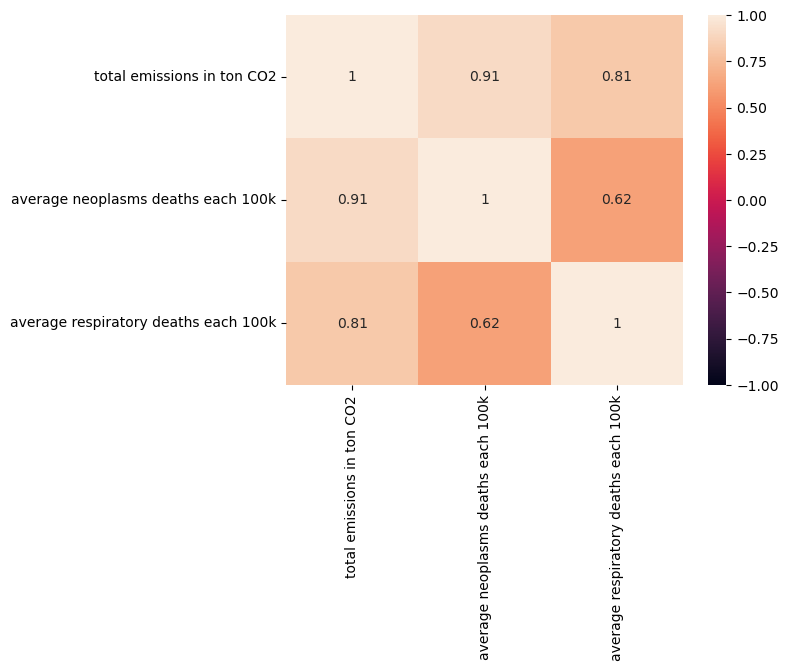

In [122]:
import seaborn as sns

plt.figure()
sns.heatmap(df_corr.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

**Observations:**
* We see that the highest correlation present is between the CO2 emissions and deaths by neoplasms. Interesting insight, needs further analysis.
* Also, we see the lowest correlation is between deaths by neoplasms and deaths by respiratory diseases.
* Important to mention the difference between correlation and causality. We've found correlation, but need further analysis to determine causality.

### Visualizations

Let's create some visualizations to be able to see our observations more clearly

In [150]:
# Set the years to be index column
years = range(2010, 2021)
df_corr.index = years
df_corr.head(5)

,total emissions in ton CO2,average neoplasms deaths each 100k,average respiratory deaths each 100k
2010,18239120.89,230.65,84.30
2011,17905957.10,227.23,83.04
2012,17725096.13,226.82,82.52
2013,17897055.91,224.04,81.40
2014,17784446.44,223.09,78.65


<AxesSubplot:>

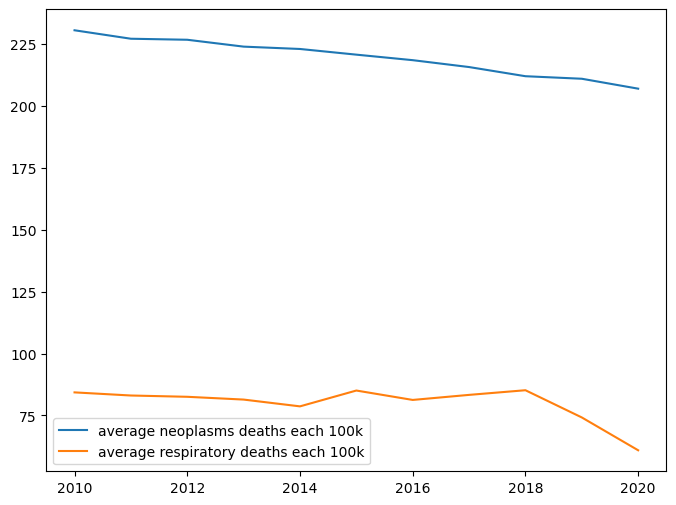

In [149]:
df_corr.drop(columns=['total emissions in ton CO2']).plot(kind='line', figsize=(8, 6))

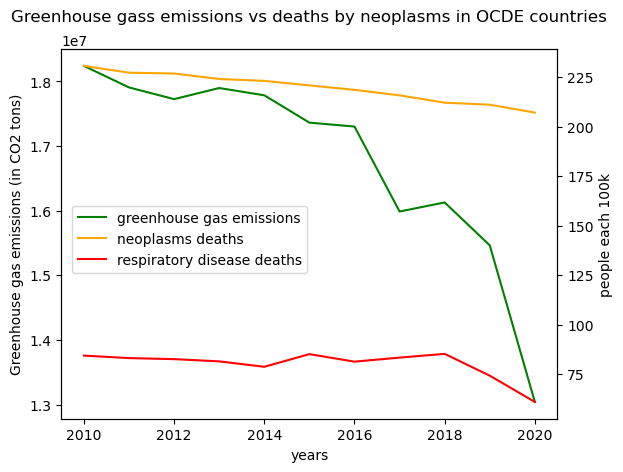

In [197]:
# Create a plot and two axis
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot emissions column in one side of 'y' axis
ax1.plot(df_corr.index, df_corr['total emissions in ton CO2'], 'g-', label="""greenhouse gas emissions""")
ax1.set_xlabel('years')
ax1.set_ylabel("""Greenhouse gas emissions (in CO2 tons)""")

# Plot both mortality rates on the other side of 'y' axis
ax2.plot(df_corr.index, df_corr['average neoplasms deaths each 100k'], 'orange', label="""neoplasms deaths""")
ax2.plot(df_corr.index, df_corr['average respiratory deaths each 100k'], 'red', label="""respiratory disease deaths""")
ax2.set_ylabel("""people each 100k""")

# Add legends and title
fig.legend(loc='lower right', bbox_to_anchor=(0.52, 0.4))
plt.title('Greenhouse gass emissions vs deaths by neoplasms in OCDE countries', pad=20)
plt.show()

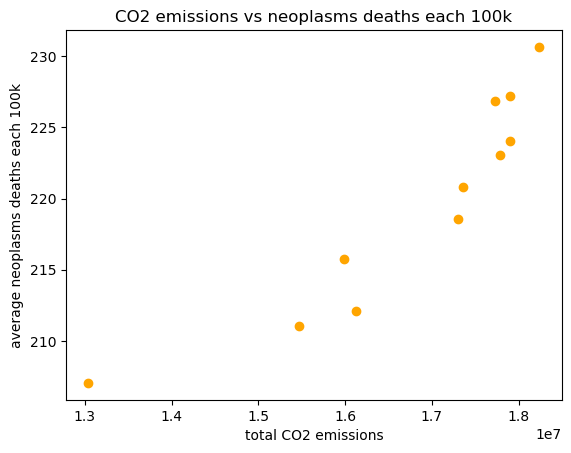

In [203]:
ax = df_corr.plot(x='total emissions in ton CO2', y='average neoplasms deaths each 100k', style='o', legend=None, color='orange')
ax.set_xlabel('total CO2 emissions')
ax.set_ylabel('average neoplasms deaths each 100k')
ax.set_title('CO2 emissions vs neoplasms deaths each 100k')
plt.show()

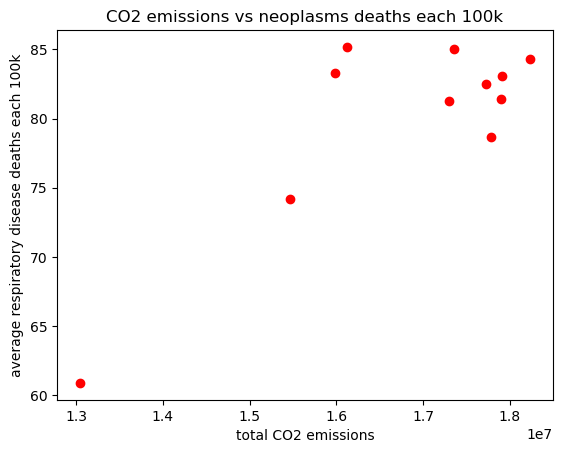

In [202]:
ax = df_corr.plot(x='total emissions in ton CO2', y='average respiratory deaths each 100k', style='o', legend=None, color='red')
ax.set_xlabel('total CO2 emissions')
ax.set_ylabel('average respiratory disease deaths each 100k')
ax.set_title('CO2 emissions vs neoplasms deaths each 100k')
plt.show()

**Observations**
* There is a positive correlation between this variables. To dischard that this correlation is circunstantial, we'll analyze how  the CO2 emissions variable behaves with some other rate mortalities, before drawing any conclusion on the subject. We'll choose some diseases that are not related to respiratory system.

In [223]:
# Create the datasets
df_mortality_assaults = df_mortality.loc[df_mortality['death_cause'] == 'Assault'].reset_index().drop(columns=['index', 'death_cause'])
df_mortality_accidents = df_mortality.loc[df_mortality['death_cause'] == 'Accidents'].reset_index().drop(columns=['index', 'death_cause'])
    
# Remove some countries                                                                                                       
df_mortality_assaults = df_mortality_assaults[df_mortality_assaults['country_name'].isin(countries)]
df_mortality_accidents = df_mortality_accidents[df_mortality_accidents['country_name'].isin(countries)]

# Calculate the total average
total_values4 = df_mortality_assaults.mean(axis=0)
total_values5 = df_mortality_accidents.mean(axis=0)

# Create new dataframes
df_total4 = pd.DataFrame(total_values4, columns=['average assaults deaths each 100k']).T
df_total5 = pd.DataFrame(total_values5, columns=['average accidents deaths each 100k']).T

df_final = pd.concat([df_total1, df_total4, df_total5], axis=0).drop(columns=['country_name']).reset_index()

# Traspose the dataframe
df_corr2 = df_final.T

# Set the first row as the columns name
new_cols = df_corr2.iloc[0]
df_corr2 = df_corr2[1:] 
df_corr2.columns = new_cols

# Changing data type
df_corr2["total emissions in ton CO2"] = df_corr2["total emissions in ton CO2"].astype(float)
df_corr2["average assaults deaths each 100k"] = df_corr2["average assaults deaths each 100k"].astype(float)
df_corr2["average accidents deaths each 100k"] = df_corr2["average accidents deaths each 100k"].astype(float)

# Delete index column
df_corr2 = df_corr2.reset_index(drop=True)

# Keeping only numeric columns
df_corr2 = df_corr2.select_dtypes(include=['float64'])
df_corr2 = df_corr2.reset_index(drop=True)

# Delete index column name
df_corr2.columns.name = None

C:\Users\renzo\AppData\Local\Temp\ipykernel_1136\1208991614.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_values4 = df_mortality_assaults.mean(axis=0)
C:\Users\renzo\AppData\Local\Temp\ipykernel_1136\1208991614.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_values5 = df_mortality_accidents.mean(axis=0)


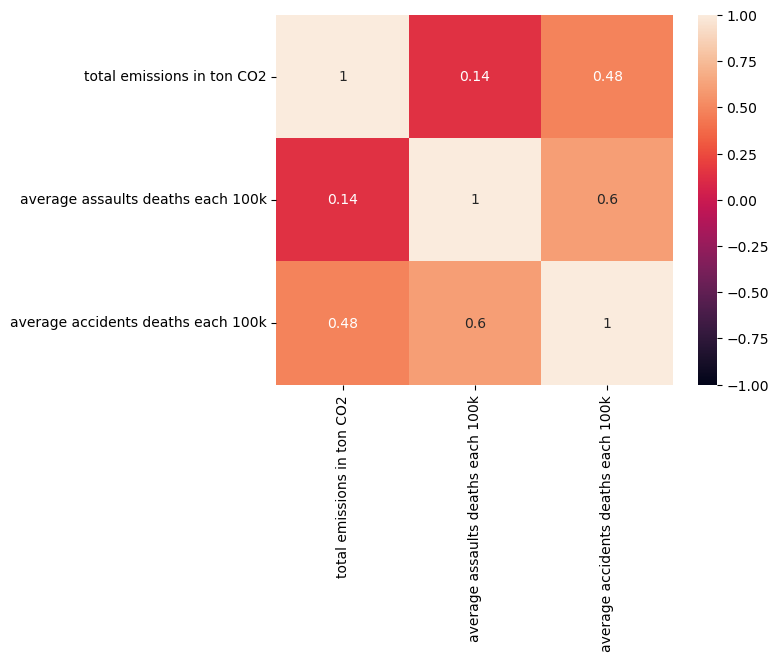

In [224]:
# And let's plot the correlation matrix
plt.figure()
sns.heatmap(df_corr2.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

**Conclusions:**

* Theres is a clear trend that indicates a strong positive correlation between both mortality from respiratory diseases and from neoplasms, and the CO2 emissions.
* This trend appears to be more clear in the case of neoplasms mortality rate.
* Such a trend do not exist in other mortality rates, such as assaults and accidents.